## Load Data/Models


In [19]:
import h5py

## These two are version-sensitive
from tensorflow.keras.models import load_model
import keras

import pandas as pd
import numpy as np

## Neural Network data
X_train = np.load("./data/X_train_s.npy")
X_test = np.load("./data/X_test_s.npy")
Y_train = np.load("./data/y_1yr_train_s.npy")
Y_test = np.load("./data/y_1yr_test_s.npy")

## Logistic regression data

## Load & Evaluate Keras Model


In [ ]:
model_file = "Acc_0.741_25May2020_1yr_best_model.h5"

f = h5py.File(model_file, 'r')

print("Model version: ", f.attrs.get('keras_version'))
print("Keras version: ", keras.__version__)#tf.keras.__version__)
print("")

## 12M
model = keras.models.load_model(model_file)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               64256     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)               

In [ ]:
#prediction = pd.DataFrame(Y_train, columns=['Y_train']).to_csv('prediction1.csv')
#Y_predicted_train = model.predict(X_train)
#prediction = pd.DataFrame(Y_predicted_train, columns=['pred_Y_train']).to_csv('prediction2.csv')
#prediction = pd.DataFrame(Y_test, columns=['Y_test']).to_csv('prediction3.csv')
#Y_predicted_test = model.predict(X_test)
#prediction = pd.DataFrame(Y_predicted_test, columns=['pred_Y_test']).to_csv('prediction4.csv')

In [ ]:
# Score and Accuracy
print(model.evaluate(X_train, Y_train))

In [22]:
#ROC
y_pred = model.predict(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.7977934132373917

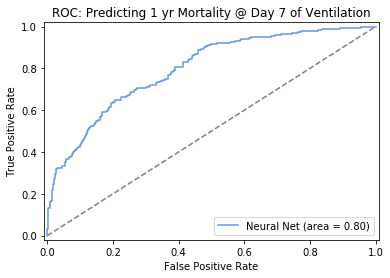

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(Y_test, y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)


plt.figure()
plt.plot(fpr, tpr, label='Neural Net (area = %0.2f)' % logit_roc_auc, color='cornflowerblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: Predicting 1 yr Mortality @ Day 7 of Ventilation')
plt.legend(loc="lower right")
## plt.savefig(fname='provent_day7_ROC', dpi=400, transparent=True)
plt.show()

In [ ]:
## np.save("fpr.npy", fpr)
## np.save("tpr.npy", tpr)
## np.save("thresholds.npy", thresholds)

In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, (y_pred>0.5).astype(int))

array([[427,  12],
       [294, 134]])

In [ ]:
# Precision recall fscore support
from sklearn.metrics import precision_recall_fscore_support
## print(precision_recall_fscore_support(Y_test, y_pred.round()))


from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred.round()))

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
## np.save("fpr.npy", fpr)
## np.save("tpr.npy", tpr)
## np.save("thresholds.npy", thresholds)

In [ ]:
!pip install -q pydot
import pydot
from keras.utils import plot_model

## plot_model(model, to_file='model.png')

## SHAP Values

In [26]:
# at Day 7
X_colnames = ['ADMISSION_AGE',
 'VD1_HEARTRATE_MIN',
 'VD1_HEARTRATE_MAX',
 'VD1_HEARTRATE_MEAN',
 'VD1_SYSBP_MIN',
 'VD1_SYSBP_MAX',
 'VD1_SYSBP_MEAN',
 'VD1_DIASBP_MIN',
 'VD1_DIASBP_MAX',
 'VD1_DIASBP_MEAN',
 'VD1_MEANBP_MIN',
 'VD1_MEANBP_MAX',
 'VD1_MEANBP_MEAN',
 'VD1_RESPRATE_MIN',
 'VD1_RESPRATE_MAX',
 'VD1_RESPRATE_MEAN',
 'VD1_TEMPC_MIN',
 'VD1_TEMPC_MAX',
 'VD1_TEMPC_MEAN',
 'VD1_SPO2_MIN',
 'VD1_SPO2_MAX',
 'VD1_SPO2_MEAN',
 'VD1_GLUCOSE_MIN',
 'VD1_GLUCOSE_MAX',
 'VD1_GLUCOSE_MEAN',
 'VMVD1_HEARTRATE_MIN',
 'VMVD1_HEARTRATE_MAX',
 'VMVD1_HEARTRATE_MEAN',
 'VMVD1_SYSBP_MIN',
 'VMVD1_SYSBP_MAX',
 'VMVD1_SYSBP_MEAN',
 'VMVD1_DIASBP_MIN',
 'VMVD1_DIASBP_MAX',
 'VMVD1_DIASBP_MEAN',
 'VMVD1_MEANBP_MIN',
 'VMVD1_MEANBP_MAX',
 'VMVD1_MEANBP_MEAN',
 'VMVD1_RESPRATE_MIN',
 'VMVD1_RESPRATE_MAX',
 'VMVD1_RESPRATE_MEAN',
 'VMVD1_TEMPC_MIN',
 'VMVD1_TEMPC_MAX',
 'VMVD1_TEMPC_MEAN',
 'VMVD1_SPO2_MIN',
 'VMVD1_SPO2_MAX',
 'VMVD1_SPO2_MEAN',
 'VMVD1_GLUCOSE_MIN',
 'VMVD1_GLUCOSE_MAX',
 'VMVD1_GLUCOSE_MEAN',
 'VMVD7_HEARTRATE_MIN',
 'VMVD7_HEARTRATE_MAX',
 'VMVD7_HEARTRATE_MEAN',
 'VMVD7_SYSBP_MIN',
 'VMVD7_SYSBP_MAX',
 'VMVD7_SYSBP_MEAN',
 'VMVD7_DIASBP_MIN',
 'VMVD7_DIASBP_MAX',
 'VMVD7_DIASBP_MEAN',
 'VMVD7_MEANBP_MIN',
 'VMVD7_MEANBP_MAX',
 'VMVD7_MEANBP_MEAN',
 'VMVD7_RESPRATE_MIN',
 'VMVD7_RESPRATE_MAX',
 'VMVD7_RESPRATE_MEAN',
 'VMVD7_TEMPC_MIN',
 'VMVD7_TEMPC_MAX',
 'VMVD7_TEMPC_MEAN',
 'VMVD7_SPO2_MIN',
 'VMVD7_SPO2_MAX',
 'VMVD7_SPO2_MEAN',
 'VMVD7_GLUCOSE_MIN',
 'VMVD7_GLUCOSE_MAX',
 'VMVD7_GLUCOSE_MEAN',
 'LD1_ANIONGAP_MIN',
 'LD1_ANIONGAP_MAX',
 'LD1_ALBUMIN_MIN',
 'LD1_ALBUMIN_MAX',
 'LD1_BANDS_MIN',
 'LD1_BANDS_MAX',
 'LD1_BICARBONATE_MIN',
 'LD1_BICARBONATE_MAX',
 'LD1_BILIRUBIN_MIN',
 'LD1_BILIRUBIN_MAX',
 'LD1_CREATININE_MIN',
 'LD1_CREATININE_MAX',
 'LD1_CHLORIDE_MIN',
 'LD1_CHLORIDE_MAX',
 'LD1_GLUCOSE_MIN',
 'LD1_GLUCOSE_MAX',
 'LD1_HEMATOCRIT_MIN',
 'LD1_HEMATOCRIT_MAX',
 'LD1_HEMOGLOBIN_MIN',
 'LD1_HEMOGLOBIN_MAX',
 'LD1_LACTATE_MIN',
 'LD1_LACTATE_MAX',
 'LD1_PLATELET_MIN',
 'LD1_PLATELET_MAX',
 'LD1_POTASSIUM_MIN',
 'LD1_POTASSIUM_MAX',
 'LD1_PTT_MIN',
 'LD1_PTT_MAX',
 'LD1_INR_MIN',
 'LD1_INR_MAX',
 'LD1_PT_MIN',
 'LD1_PT_MAX',
 'LD1_SODIUM_MIN',
 'LD1_SODIUM_MAX',
 'LD1_BUN_MIN',
 'LD1_BUN_MAX',
 'LD1_WBC_MIN',
 'LD1_WBC_MAX',
 'LMVD1_ANIONGAP_MIN',
 'LMVD1_ANIONGAP_MAX',
 'LMVD1_ALBUMIN_MIN',
 'LMVD1_ALBUMIN_MAX',
 'LMVD1_BANDS_MIN',
 'LMVD1_BANDS_MAX',
 'LMVD1_BICARBONATE_MIN',
 'LMVD1_BICARBONATE_MAX',
 'LMVD1_BILIRUBIN_MIN',
 'LMVD1_BILIRUBIN_MAX',
 'LMVD1_CREATININE_MIN',
 'LMVD1_CREATININE_MAX',
 'LMVD1_CHLORIDE_MIN',
 'LMVD1_CHLORIDE_MAX',
 'LMVD1_GLUCOSE_MIN',
 'LMVD1_GLUCOSE_MAX',
 'LMVD1_HEMATOCRIT_MIN',
 'LMVD1_HEMATOCRIT_MAX',
 'LMVD1_HEMOGLOBIN_MIN',
 'LMVD1_HEMOGLOBIN_MAX',
 'LMVD1_LACTATE_MIN',
 'LMVD1_LACTATE_MAX',
 'LMVD1_PLATELET_MIN',
 'LMVD1_PLATELET_MAX',
 'LMVD1_POTASSIUM_MIN',
 'LMVD1_POTASSIUM_MAX',
 'LMVD1_PTT_MIN',
 'LMVD1_PTT_MAX',
 'LMVD1_INR_MIN',
 'LMVD1_INR_MAX',
 'LMVD1_PT_MIN',
 'LMVD1_PT_MAX',
 'LMVD1_SODIUM_MIN',
 'LMVD1_SODIUM_MAX',
 'LMVD1_BUN_MIN',
 'LMVD1_BUN_MAX',
 'LMVD1_WBC_MIN',
 'LMVD1_WBC_MAX',
 'LMVD7_ANIONGAP_MIN',
 'LMVD7_ANIONGAP_MAX',
 'LMVD7_ALBUMIN_MIN',
 'LMVD7_ALBUMIN_MAX',
 'LMVD7_BANDS_MIN',
 'LMVD7_BANDS_MAX',
 'LMVD7_BICARBONATE_MIN',
 'LMVD7_BICARBONATE_MAX',
 'LMVD7_BILIRUBIN_MIN',
 'LMVD7_BILIRUBIN_MAX',
 'LMVD7_CREATININE_MIN',
 'LMVD7_CREATININE_MAX',
 'LMVD7_CHLORIDE_MIN',
 'LMVD7_CHLORIDE_MAX',
 'LMVD7_GLUCOSE_MIN',
 'LMVD7_GLUCOSE_MAX',
 'LMVD7_HEMATOCRIT_MIN',
 'LMVD7_HEMATOCRIT_MAX',
 'LMVD7_HEMOGLOBIN_MIN',
 'LMVD7_HEMOGLOBIN_MAX',
 'LMVD7_LACTATE_MIN',
 'LMVD7_LACTATE_MAX',
 'LMVD7_PLATELET_MIN',
 'LMVD7_PLATELET_MAX',
 'LMVD7_POTASSIUM_MIN',
 'LMVD7_POTASSIUM_MAX',
 'LMVD7_PTT_MIN',
 'LMVD7_PTT_MAX',
 'LMVD7_INR_MIN',
 'LMVD7_INR_MAX',
 'LMVD7_PT_MIN',
 'LMVD7_PT_MAX',
 'LMVD7_SODIUM_MIN',
 'LMVD7_SODIUM_MAX',
 'LMVD7_BUN_MIN',
 'LMVD7_BUN_MAX',
 'LMVD7_WBC_MIN',
 'LMVD7_WBC_MAX',
 'HEIGHT_AVG',
 'WEIGHTD1_WEIGHT_AVG',
 'WEIGHTMVD1_WEIGHT_AVG',
 'WEIGHTMVD7_WEIGHT_AVG',
 'HOSP_ADMIT_CONGESTIVE_HEART_FAILURE',
 'HOSP_ADMIT_CARDIAC_ARRHYTHMIAS',
 'HOSP_ADMIT_VALVULAR_DISEASE',
 'HOSP_ADMIT_PULMONARY_CIRCULATION',
 'HOSP_ADMIT_PERIPHERAL_VASCULAR',
 'HOSP_ADMIT_HYPERTENSION',
 'HOSP_ADMIT_PARALYSIS',
 'HOSP_ADMIT_OTHER_NEUROLOGICAL',
 'HOSP_ADMIT_CHRONIC_PULMONARY',
 'HOSP_ADMIT_DIABETES_UNCOMPLICATED',
 'HOSP_ADMIT_DIABETES_COMPLICATED',
 'HOSP_ADMIT_HYPOTHYROIDISM',
 'HOSP_ADMIT_RENAL_FAILURE',
 'HOSP_ADMIT_LIVER_DISEASE',
 'HOSP_ADMIT_PEPTIC_ULCER',
 'HOSP_ADMIT_AIDS',
 'HOSP_ADMIT_LYMPHOMA',
 'HOSP_ADMIT_METASTATIC_CANCER',
 'HOSP_ADMIT_SOLID_TUMOR',
 'HOSP_ADMIT_RHEUMATOID_ARTHRITIS',
 'HOSP_ADMIT_COAGULOPATHY',
 'HOSP_ADMIT_OBESITY',
 'HOSP_ADMIT_WEIGHT_LOSS',
 'HOSP_ADMIT_FLUID_ELECTROLYTE',
 'HOSP_ADMIT_BLOOD_LOSS_ANEMIA',
 'HOSP_ADMIT_DEFICIENCY_ANEMIAS',
 'HOSP_ADMIT_ALCOHOL_ABUSE',
 'HOSP_ADMIT_DRUG_ABUSE',
 'HOSP_ADMIT_PSYCHOSES',
 'HOSP_ADMIT_DEPRESSION',
 'ICU_D1_APSIII',
 'ICU_D1_OASIS',
 'ICU_D1_SOFA',
 'ICU_D1_LODS',
 'ICU_D1_SAPSII',
 'BMID1',
 'BMIMVD1',
 'BMIMVD7',
 'VPD1_VP',
 'VPMVD1_VP',
 'VPMVD7_VP',
 'RRTD1_RRT',
 'RRTMVD1_RRT',
 'RRTMVD7_RRT',
 'ADMISSION_TYPE_ELECTIVE',
 'ADMISSION_TYPE_EMERGENCY',
 'ADMISSION_TYPE_URGENT',
 'ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE',
 'ADMISSION_LOCATION_EMERGENCY ROOM ADMIT',
 'ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI',
 'ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM',
 'ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR',
 'FIRST_CAREUNIT_CCU',
 'FIRST_CAREUNIT_CSRU',
 'FIRST_CAREUNIT_MICU',
 'FIRST_CAREUNIT_SICU',
 'FIRST_CAREUNIT_TSICU',
 'GENDER_F',
 'GENDER_M']

In [27]:
import matplotlib.pyplot as plt
import shap

explainer = shap.DeepExplainer(model, X_train)
shap_values = explainer.shap_values(X_train)

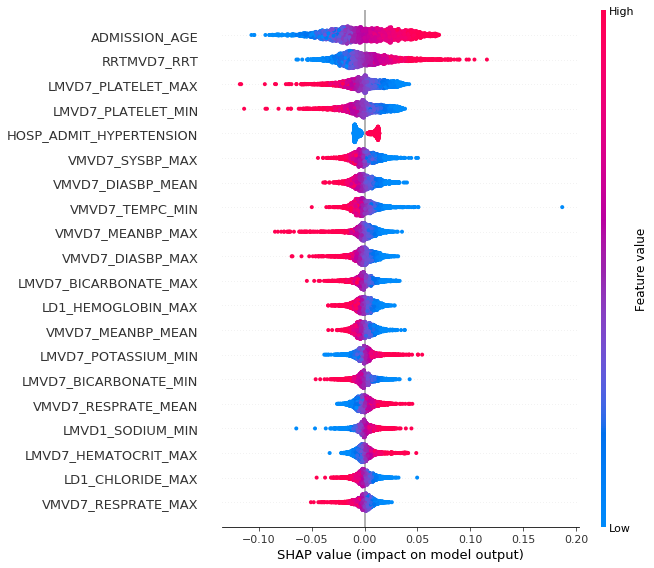

In [28]:
# summarize the effects of all the features for one class
shap.summary_plot(shap_values[0], X_train, feature_names=X_colnames)

## ProVent Logistic Regresion (not taken for paper)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [ ]:
X_train.shape

In [ ]:
y_pred = clf.predict_proba(X_test)
y_pred = y_pred[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred.round()))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(Y_test, y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Neural Net (area = %0.2f)' % logit_roc_auc, color='cornflowerblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: Predicting 3 Month Mortality @ Day 7 of Ventilation')
plt.legend(loc="lower right")
plt.savefig(fname='provent_day7_ROC', dpi=400, transparent=True)
plt.show()

## LR alternative (taken for paper) 

In [ ]:
#LR
import numpy as np

X = np.load("/content/drive/My Drive/HST.953- Team N/Data/new/prepared_LR/standardized/3M/7D/X_s.npy")
y = np.load("/content/drive/My Drive/HST.953- Team N/Data/new/prepared_LR/standardized/3M/7D/y_s.npy")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X, y)
predicted = cross_val_predict(logreg, X, y, cv=10)
predicted_proba = cross_val_predict(logreg, X, y, cv=10, method='predict_proba')

In [ ]:
logreg.coef_
#np.exp(logreg.coef_)

In [ ]:
print(confusion_matrix(y, predicted))
print(accuracy_score(y, predicted))
print(classification_report(y, predicted))

logit_roc_auc = roc_auc_score(y, predicted)
fpr, tpr, thresholds = roc_curve(y, predicted_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc, color='cornflowerblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: Predicting 3 Month Mortality @ Day 7 of Ventilation')
plt.legend(loc="lower right")
plt.savefig(fname='provent_day7_ROC', dpi=400, transparent=True)
plt.show()

## LR VS NN

In [ ]:

nn_roc_auc = 0.81
nn_tpr = np.load(file='tpr.npy')
nn_fpr = np.load(file='fpr.npy')
nn_thresholds = np.load(file='thresholds.npy')

In [ ]:
logit_roc_auc = roc_auc_score(y, predicted)
fpr, tpr, thresholds = roc_curve(y, predicted_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc, color='cornflowerblue')
plt.plot(nn_fpr, nn_tpr, label='Neural Network (AUC = %0.2f)' % nn_roc_auc, color='darkred')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: Predicting 3 Month Mortality @ Day 7 of Ventilation')
plt.legend(loc="lower right")
plt.savefig(fname='comparison_day7_ROC', dpi=400, transparent=True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

X = np.load("/content/drive/My Drive/Live Coding HEC/data/X2.npy")
y = np.load("/content/drive/My Drive/Live Coding HEC/data/y2.npy")
X_colnames = np.load("/content/drive/My Drive/Live Coding HEC/data/columns.npy")

# Split data 80:20 in traing, test data
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=1)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Set up and train model
rf = RandomForestClassifier(verbose=2, random_state=42, n_jobs = -1, class_weight="balanced_subsample", n_estimators=250, max_depth=None, min_samples_split=2, min_samples_leaf=1, bootstrap=True, max_features="auto")

trained_rf = rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)[:, 1]


In [ ]:
!pip install shap
import shap
#shap.initjs()


# Below imports are used to print out pretty pandas dataframes
#from IPython.display import display, HTML
#%matplotlib inline

In [ ]:
trained_rf

In [ ]:
#number_samples = 10
# load JS visualization code to notebook
shap.initjs()
X_df_short = X_df.head(3)
explainer = shap.TreeExplainer(trained_rf)
shap_values = explainer.shap_values(X_df_short)

shap.summary_plot(shap_values, X_df_short)

In [ ]:
shap.summary_plot(shap_values[0], X_df_short)